In [1]:
import pandas as pd
import numpy as np
import missingno as msno
#import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import sqlite3

db_full = r"..\data\interim\full_data_sqlite.db"
#db_2000 = r"..\data\interim\after_2000_sqlite.db"
db_2010 = r"..\data\interim\after_2010_sqlite.db"

In [2]:
con = sqlite3.connect(db_full)
query = "SELECT * FROM publications"
df_publications = pd.read_sql_query(query, con)
con.close()

In [3]:
df_publications.shape
df_publications.info()
df_publications.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894081 entries, 0 to 4894080
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   title            object 
 2   year             int64  
 3   n_citation       int64  
 4   n_author         float64
 5   n_reference      float64
 6   abstract_length  float64
 7   page_start       object 
 8   page_end         object 
 9   doc_type         object 
 10  venue            object 
 11  venue_type       object 
 12  publisher        object 
 13  volume           object 
 14  issue            object 
dtypes: float64(3), int64(3), object(9)
memory usage: 560.1+ MB


id                 4894081
title              4894081
year               4894081
n_citation         4894081
n_author           4894063
n_reference        3777107
abstract_length    4232520
page_start         4356226
page_end           4112329
doc_type           4394640
venue              4846973
venue_type         4371970
publisher          4134190
volume             2183176
issue              1618242
dtype: int64

In [4]:
df_publications.head()

,id,title,year,n_citation,n_author,n_reference,abstract_length,page_start,page_end,doc_type,venue,venue_type,publisher,volume,issue
0,1091,Preliminary Design of a Network Protocol Learn...,2013,1,8.0,2.0,567.0,89,93,Conference,International Conference on Human-Computer Int...,C,"Springer, Berlin, Heidelberg",None,None
1,1388,Further Results on Independence in Direct-Prod...,2000,1,1.0,NaN,NaN,None,None,Journal,Ars Combinatoria,J,None,56,None
2,1674,A methodology for the physically accurate visu...,2011,1,2.0,15.0,2035.0,137,144,Conference,International Conference on Virtual Reality,C,Eurographics Association,None,None
3,1688,"Comparison of GARCH, Neural Network and Suppor...",2009,6,4.0,3.0,613.0,597,602,Conference,Pattern Recognition and Machine Intelligence,C,"Springer, Berlin, Heidelberg",None,None
4,2431,Transaction processing using J2EE application:...,2006,0,1.0,NaN,NaN,105,114,None,Int. CMG Conference,None,None,None,None


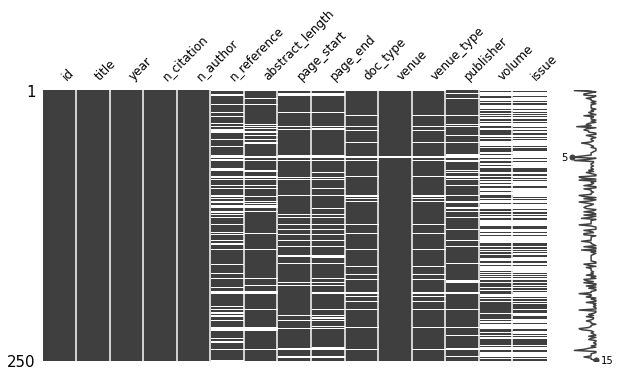

In [9]:
msno.matrix(df_publications.sample(250),figsize=(10,5),fontsize=12)

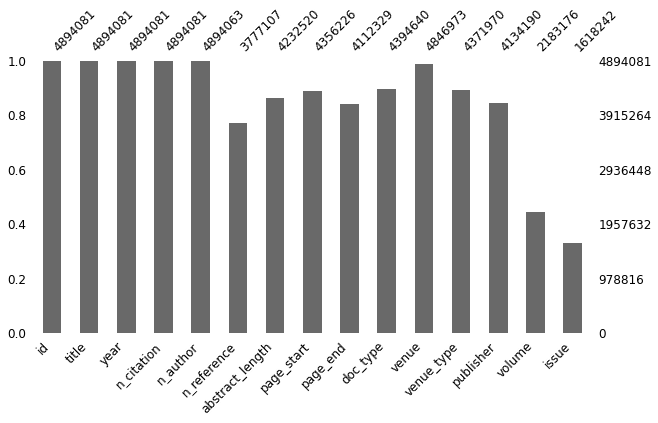

In [10]:
msno.bar(df_publications,figsize=(10,5),fontsize=12)

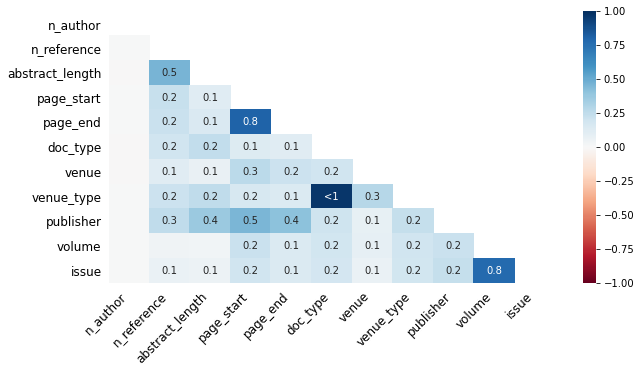

In [11]:
msno.heatmap(df_publications,figsize=(10,5),fontsize=12)

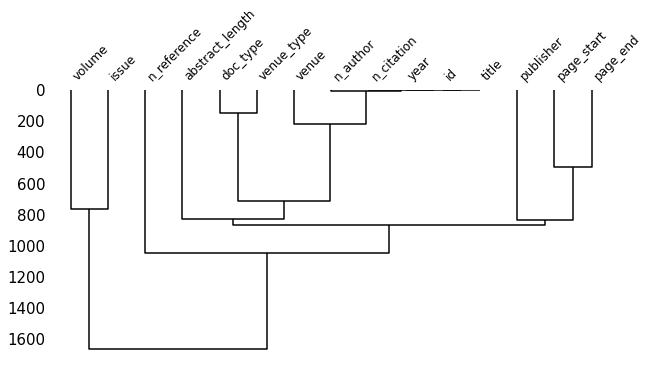

In [12]:
msno.dendrogram(df_publications,figsize=(10,5),fontsize=12)

In [16]:
df_publications.loc[df_publications.year == 0]

,id,title,year,n_citation,n_author,n_reference,abstract_length,page_start,page_end,doc_type,venue,venue_type,publisher,volume,issue
4391842,2909022900,Energy harvesting Aided Device-to-Device Commu...,0,0,NaN,NaN,4281.0,None,None,Dataset,,None,None,None,None
4392742,2909249550,Learning transfer-based adaptive energy minimi...,0,0,NaN,NaN,2222.0,None,None,Dataset,,None,None,None,None
4393879,2909520339,Improved system identification using artificia...,0,0,NaN,NaN,1967.0,None,None,Dataset,,None,None,None,None
4394060,2909562932,A survey of FPGA-based LDPC decoders,0,0,NaN,NaN,NaN,None,None,Dataset,,None,None,None,None
4394097,2909572242,Surface and electrical characterization of Ag/...,0,0,NaN,NaN,NaN,None,None,Dataset,,None,None,None,None
4394430,2909647071,A Scalable Turbo Decoding Algorithm for High-T...,0,0,NaN,NaN,431.0,None,None,Dataset,,None,None,None,None
4397444,2910367475,Recommendations for securing Internet of Thing...,0,0,NaN,NaN,904.0,None,None,Dataset,,None,None,None,None
4400034,2910995768,Discrete Multi-Tone Digital Subscriber Loop Pe...,0,0,NaN,NaN,401.0,None,None,Dataset,,None,None,None,None
4400320,2911058490,EXIT Chart-Aided Convergence Analysis of Recur...,0,0,NaN,NaN,578.0,None,None,Dataset,,None,None,None,None


In [17]:
df_publications['doc_type'].value_counts()

Conference     2245013
Journal        1919348
Repository      214762
Book             12823
BookChapter       1614
Patent            1062
Dataset             18
Name: doc_type, dtype: int64

In [20]:
df_publications.groupby('year')['doc_type'].value_counts().unstack()

doc_type,Book,BookChapter,Conference,Dataset,Journal,Patent,Repository
year,,,,,,,
0,NaN,NaN,NaN,9.0,NaN,NaN,NaN
1800,NaN,NaN,1.0,NaN,2.0,NaN,NaN
1838,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1841,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1857,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2016,493.0,25.0,136515.0,6.0,112840.0,63.0,24555.0
2017,352.0,15.0,134216.0,1.0,124523.0,51.0,32429.0
2018,323.0,15.0,139697.0,2.0,125238.0,41.0,38124.0


Text(0.5, 1.0, 'Publications per year')

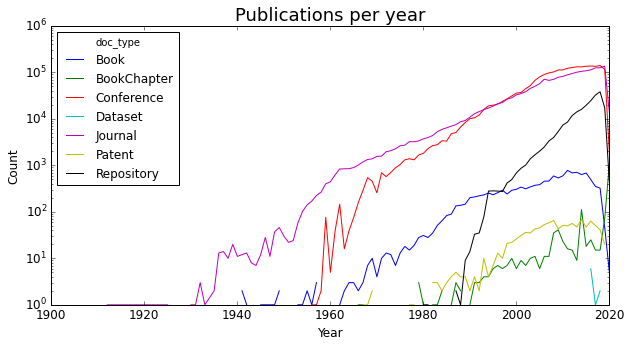

In [32]:
df_publications.groupby('year')['doc_type'].value_counts().unstack().plot(figsize=(10,5),fontsize=12)
plt.xlim(1900, 2020)
plt.yscale("log")
plt.xlabel("Year",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Number of publications over time",fontsize=18)

Text(0.5, 1.0, 'Median abstract length over time')

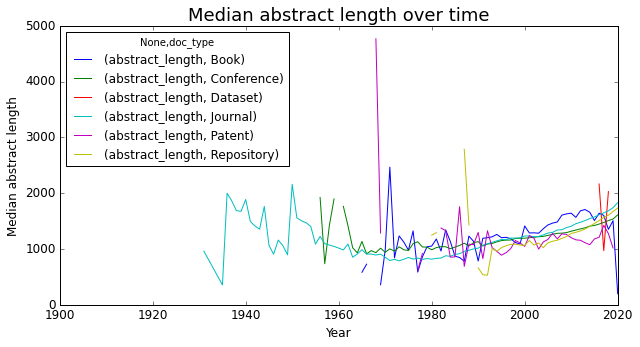

In [42]:
df_publications.loc[df_publications.year > 0, ['year','doc_type','abstract_length']].dropna().groupby(['year', 'doc_type']).median().unstack().plot(figsize=(10,5),fontsize=12)
plt.xlim(1900, 2020)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Median abstract length",fontsize=12)
plt.title("Median abstract length over time",fontsize=18)

In [3]:
df_publications.loc[df_publications.doc_type.isnull()].head()

,id,title,year,n_citation,n_author,n_reference,abstract_length,page_start,page_end,doc_type,venue,venue_type,publisher,volume,issue
4,2431,Transaction processing using J2EE application:...,2006,0,1.0,NaN,NaN,105,114,None,Int. CMG Conference,None,None,None,None
5,3015,Development of Remote Monitoring and Control D...,2011,0,5.0,4.0,1018.0,102,109,None,International Conference on Grid and Distribut...,None,"Springer, Berlin, Heidelberg",None,None
6,3787,Reasonig about Set-Oriented Methods in Object ...,1998,0,2.0,NaN,NaN,343,358,None,SEBD,None,None,None,None
9,6154,Utility Maximizing Networks.,2008,2,1.0,NaN,NaN,344,357,None,IKE,None,None,None,None
11,6615,Exponential Family of Level Dependent Choquet ...,2013,2,2.0,2.0,804.0,477,484,None,AGOP,None,"Springer, Berlin, Heidelberg",None,None


In [3]:
df_publications.loc[df_publications.doc_type.isnull()].shape[0]

499441

In [4]:
df_publications.loc[df_publications.doc_type.isnull() & df_publications.venue.notnull()].shape[0]

465818

In [5]:
journal_kw = ['journal']
conference_kw = ['conference', 'conf.', 'symposium', 'tagung', 'kongress', 'workshop', 'meeting', 'proceedings']
# book_kw = ['handbook', 'encyclopedia']
def infer_doc_type(venue_str):
    if any(kw in venue_str for kw in conference_kw):
        return 'Conference'
    if any(kw in venue_str for kw in journal_kw):
        return 'Journal'
    return None

In [7]:
infered_type = df_publications.venue.astype(str).apply(str.lower).apply(infer_doc_type)

condition = df_publications.doc_type.isnull() & df_publications.venue.notnull() & infered_type.eq('Conference')
df_publications.loc[condition, 'doc_type'] = 'Conference'
df_publications.loc[condition, 'venue_type'] = 'C'

condition = df_publications.doc_type.isnull() & df_publications.venue.notnull() & infered_type.eq('Journal')
df_publications.loc[condition, 'doc_type'] = 'Journal'
df_publications.loc[condition, 'venue_type'] = 'J'

df_publications.head()

,id,title,year,n_citation,n_author,n_reference,abstract_length,page_start,page_end,doc_type,venue,venue_type,publisher,volume,issue
0,1091,Preliminary Design of a Network Protocol Learn...,2013,1,8.0,2.0,567.0,89,93,Conference,International Conference on Human-Computer Int...,C,"Springer, Berlin, Heidelberg",None,None
1,1388,Further Results on Independence in Direct-Prod...,2000,1,1.0,NaN,NaN,None,None,Journal,Ars Combinatoria,J,None,56,None
2,1674,A methodology for the physically accurate visu...,2011,1,2.0,15.0,2035.0,137,144,Conference,International Conference on Virtual Reality,C,Eurographics Association,None,None
3,1688,"Comparison of GARCH, Neural Network and Suppor...",2009,6,4.0,3.0,613.0,597,602,Conference,Pattern Recognition and Machine Intelligence,C,"Springer, Berlin, Heidelberg",None,None
4,2431,Transaction processing using J2EE application:...,2006,0,1.0,NaN,NaN,105,114,Conference,Int. CMG Conference,C,None,None,None


In [8]:
df_publications.loc[df_publications.doc_type.isnull() & df_publications.venue.notnull()].shape[0]

261923

In [10]:
((465818 - 261923)/4894081) * 100

4.166154994165401

In [12]:
pickle_path = '..\data\interim\pub.pkl'
df_publications.to_pickle(pickle_path)